<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [179]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


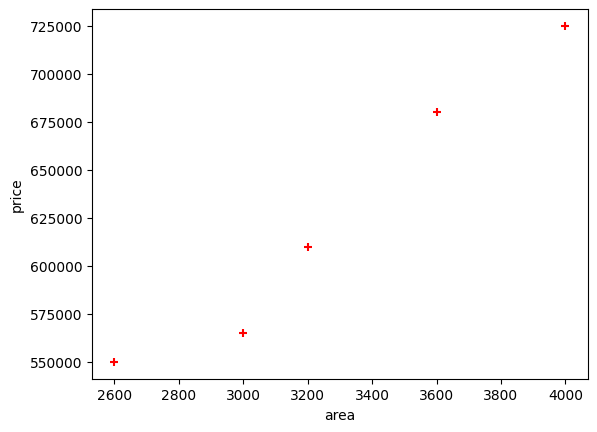

In [181]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [182]:
new_df = df.drop('price',axis='columns')
new_df
new_df.shape


(5, 1)

In [183]:

new_df_vector = new_df.values.reshape(-1)
new_df_vector.shape

(5,)

In [184]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [185]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [186]:
reg.predict([[3300]])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [187]:
reg.coef_

array([135.78767123])

In [188]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [189]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [190]:
reg.predict([[5000]])

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [191]:
area_df1 = pd.read_csv("areas.csv")
area_df1.head(3)
area_df = area_df1[["area"]]
area_df.shape

(13, 1)

In [192]:
area_df_x = area_df.values.reshape(-1)
area_df_x.shape

(13,)

In [193]:
price1 = reg.predict(area_df)
price1

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [194]:

price1 = np.round(price1, 2)
area_df['prices']=price1
area_df

,area,prices
0,1000,316404.11
1,1500,384297.95
2,2300,492928.08
3,3540,661304.79
4,4120,740061.64
5,4560,799808.22
6,5490,926090.75
7,3460,650441.78
8,4750,825607.88
9,2300,492928.08


In [195]:
area_df.to_csv("predicted_prices.csv", index=False)

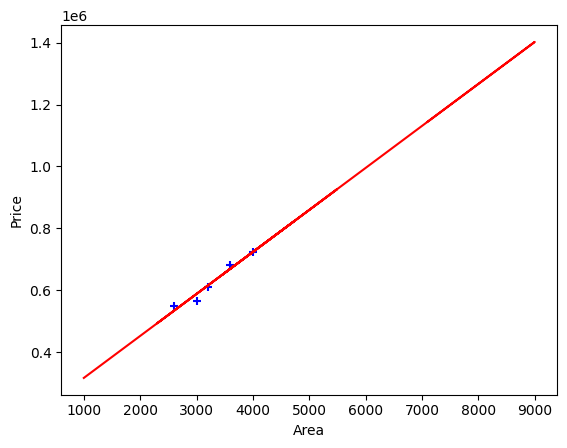

In [196]:
df1 = pd.read_csv('prediction.csv')


# 산점도 그리기
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area, df.price, color='blue', marker='+')

# 회귀선 그리기
plt.plot(area_df_x, price1, color='red')  # 회귀선 추가


plt.show()  # 그래프 출력

In [197]:
price1 = np.round(price1, 2)
area_df.to_csv("predicted_prices2.csv", index=False)


<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442